# <font color="red"> MBA em IA e Big Data</font>
## <span style="color:red">Linguagens e Ferramentas para Inteligência Artificial e Big Data (Python e SQL)</span>

### <span style="color:darkred">Python II, Visualização e Aprendizado de Máquina</span>

## Exercícios com soluções

*Moacir Antonelli Ponti*<br>
*ICMC/USP São Carlos*

#### <span style="color:red">Recomenda-se fortemente que os exercícios sejam feitos sem consultar as respostas antecipadamente.</span>

# Parte 1 - Python 

## Exercício 1)

Crie uma classe `string_list` que permita instanciar objetos que manipule uma lista de strings. Assuma que cada string possui palavras separadas por um espaço em branco. Para esse exercício assuma que não há pontuações.

A classe deve:
* Permitir instanciar um objeto, inicializando uma lista vazia. 
* Possuir um método `add()` que adiciona uma nova string na lista existente
* Possuir um método `sizes()` que retorne uma lista de inteiros contendo o tamanho de cada string.

--- 

In [1]:
class string_list:
    def __init__(self):
        self.ls = []

    def add(self,new_string):
        self.ls.append(new_string)
        
    def sizes(self):
        return [len(st) for st in self.ls]

In [2]:
sl = string_list()
print(sl)

In [3]:
sl.add('Fluent Python')
sl.add('The Art of Computer Programming')

In [4]:
sl.sizes()

[13, 31]

---

## Exercício 2)


Modifique a classe `string_list` do exercício anterior, incluindo novas funcionalidades:

* um método `__str__` que retorne a string formada pelas duas primeiras strings e depois informe quantas existem no total. Por exemplo, ao usar print num objeto contendo 4 strings: ['Introduction to Algorithms', 'The Art of Computer Programming', 'Machine Learning', 'Design Patterns'], a resposta deve ser:
```
List of Strings:
Introduction to Algorithms
The Art of Computer Programming
...
(Total: 4 strings)
```
* um método que calcule a distância de Hamming entre duas strings. O método recebe as posições das duas strings e retorna a distância. A distância de Hamming entre duas strings de mesmo tamanho é o número de posições nas quais os símbolos correspondentes são diferentes.
    * para esse exercício compute a distância de Hamming nivelando pela string de menor tamanho. Exemplo: dist(`abcde`,`abc12345`) = 2, relativo aos elementos `de` na primeira que são diferentes de `12` na segunda, desconsiderando os elementos `345` na segunda string que excedem o tamanho da primeira

* um método `word_count()` que retorne um dicionário cujas chaves são palavras e o valor representa a frequência daquela palavra em todas as strings. Não deve ser sensível a caixa, isso é: 'Art', 'art', 'ART' são consideradas a mesma palavra, por exemplo.


In [5]:
# testando comprehension para computar a distancia de Hamming
s1 = 'abcd1'
s2 = 'abd1'
[1 for c1, c2 in zip(s1,s2) if c1==c2]
len([1 for c1, c2 in zip(s1,s2) if c1==c2])

2

In [7]:
class string_list:
    def __init__(self):
        self.ls = []

    def add(self,new_string):
        self.ls.append(new_string)
        
    def sizes(self):
        return [len(st) for st in self.ls]
    
    def __str__(self):
        printobj = 'List of Strings:\n'
        for st in self.ls[:2]:
            printobj += st + '\n'
        printobj += '..\n(Total: '+str(len(self.ls))+' strings)'
        return printobj
    
    def hamming_distance(self, i, j):
        return len([1 for c1, c2 in zip(self.ls[i], self.ls[j]) if c1!=c2])
        
    def word_count(self):
        dc = {}
        for st in self.ls:
            for w in st.split():
                if w not in dc:
                    dc[w] = 1
                else:
                    dc[w] += 1
        return dc

In [8]:
sl = string_list()
sl.add('Fluent Python')
sl.add('The Art of Computer Programming')
sl.add('Algorithms Introduction')
sl.add('Programming Python')
sl.add('Algorithms and Data Structures in Python')

In [9]:
sl.sizes()

[13, 31, 23, 18, 40]

In [10]:
print(sl)

List of Strings:
Fluent Python
The Art of Computer Programming
..
(Total: 5 strings)


In [11]:
s2 = string_list()
s2.add('Fluent Python')
print(s2)

List of Strings:
Fluent Python
..
(Total: 1 strings)


In [12]:
d = sl.hamming_distance(2,4)
print(d)
d = sl.hamming_distance(1,4)
print(d)

11
28


In [13]:
wc = sl.word_count()
print(wc)

{'Fluent': 1, 'Python': 3, 'The': 1, 'Art': 1, 'of': 1, 'Computer': 1, 'Programming': 2, 'Algorithms': 2, 'Introduction': 1, 'and': 1, 'Data': 1, 'Structures': 1, 'in': 1}


---
# Parte 2 - Visualização

## Exercício 3)

Usando a base de dados auto prices, exiba um gráfico de pontos visualizando pontos formados por city-mpg e highway-mpg. Exiba os pontos com marcador 'd' e cor 'c', nomeeie os eixos adequadamente, insira um título, e exiba a figura com tamanho 4 x 4.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  

auto = pd.read_csv('./data/auto.csv')

def read_data(fileName = "/home/icarus/MBA_AI_e_ML/01CursoLinguagens e Ferramentas_Frameworks/Semana3-Python_e_Frameworks/dados_semana3/auto.csv"):
    df = pd.read_csv(fileName)
    
    missing_atts = [colName for (colName, colData) in auto.iteritems() if np.any(colData=='?')]
    missing_atts.remove('num-of-doors')                                
    
    for column in missing_atts:
        # substitui ? por nan
        df.loc[df[column] == '?', column] = np.nan

    doors = {'two':2, 'four':4, '?':np.nan}
    df['num-of-doors'] = df['num-of-doors'].apply(lambda x: doors[x])
    
    missing_atts.append('num-of-doors')
    
    # remove linhas com nans
    df.dropna(axis = 0, inplace = True)

    # converte as colunas para valores numéricos
    # como elas possuíam '?' são carregadas automaticamente como strings
    for column in missing_atts:
        df[column] = pd.to_numeric(df[column])
        
    return df

auto = read_data()

Text(0, 0.5, 'Highway MPG')

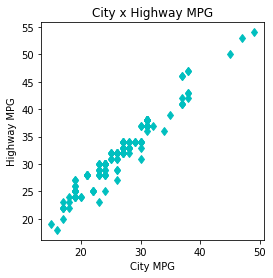

In [3]:
fig = plt.figure(figsize=(4,4))
ax = fig.gca()
plt.plot(auto['city-mpg'], auto['highway-mpg'], 'dc')
ax.set_title('City x Highway MPG')
ax.set_xlabel('City MPG')
ax.set_ylabel('Highway MPG')

## Exercício 4)

Considere os dois arrays l1 e l2 abaixo. Monte um gráfico de linha em uma figura de tamanho 8x5 que:
1. exiba essas listas com relação aos elementos da lista x, i.e. x deve estar no eixo horizontal, l1 e l2 no vertical. 
2. configure as linhas com diferentes aspectos de cor, tipo de linha, espessura da linha, sem usar marcador.
3. adicione uma legenda, l1 deve ter rótulo 'senoide' e a l2 deve ter rótulo 'logaritmo', posicionando-a sem sobrepor com os gráficos
4. ajuste os eixos de forma que o eixo y esteja entre -7 e 2
5. insira o rótulo 'time' no eixo x

In [4]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(0.0005,2.1,60)
l1 = np.sin(2*x*np.pi)*x
l2 = np.log(2*x)

(-7.0, 2.0)

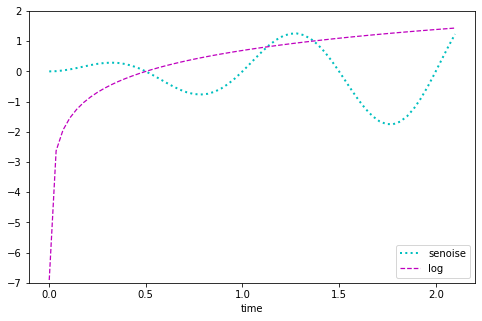

In [5]:
fig = plt.figure(figsize=(8,5))
ax = fig.gca()
plt.plot(x,l1,'c:',linewidth=2)
plt.plot(x,l2,'m--',linewidth=1.25)
ax.set_xlabel('time')
plt.legend(['senoise', 'log'], loc='lower right') # upper/lower right/left

# limites do gráfico
ax.set_ylim([-7, 2])

## Exercício 5)

Considerando a base de dados car auto
1. Exiba um histograma da variável "horsepower", apenas para os elementos que sejam menores ou iguais a 120, utilizando 12 bins.
2. Mostre um box plot da mesma variável, que terá um ponto máximo, fora dos bigodes. Encontre qual é esse ponto e imprima na tela uma seta apontando para o ponto no boxplot contendo o texto relativo ao `make` e `aspiration` dessa observação, conforme figura abaixo.


Text(0.5, 0, 'Horsepower')

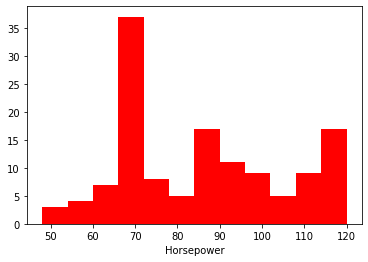

In [9]:
plt.hist(auto.loc[auto['horsepower']<=120, ['horsepower']], bins=12, facecolor='r')
plt.xlabel('Horsepower')    # rótulo do eixo horizontal

In [10]:
x = auto.loc[auto['horsepower']>190]
x

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
105,3,194,nissan,gas,turbo,2.0,hatchback,rwd,front,91.3,...,181,mpfi,3.43,3.27,7.8,200,5200,17,23,19699


Text(1.1, 190, 'nissan turbo')

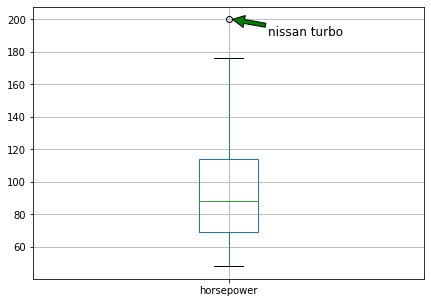

In [11]:
make_engine = x['make'].item() + ' '+ x['aspiration'].item()
#make_engine= '<make> <aspiration>'
fig = plt.figure(figsize=(7,5))
ax = fig.gca()  
auto[['horsepower']].boxplot(ax = ax)
plt.annotate(make_engine, fontsize=12, 
             xy=(1.01,200), xytext=(1.1, 190), # gera uma anotação
             arrowprops=dict(facecolor='green'))

---
# Parte 3 - Aprendizado de Máquina

## Exercício 6)

Carregue a base de dados Iris por meio do `load_iris` no módulo `sklearn`
* Imprima na tela o número de instâncias e atributos (X)
* Imprima na tela o número de elementos distintos na sua variável alvo (y)
* Separe os dados em 75% para treinamento e 25% para testes
* Treine um classificador SVM nesses dados e:
    1. realize a predição nos dados de teste 
    2. exiba na tela os rótulos preditos para os quais o classificador errou
    3. exiba na tela o score relativo aos dados de treinamento e teste

In [12]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import svm 

X, y = load_iris(return_X_y=True) # data, target

print('Tamanho dos dados', X.shape)
print('Classes', np.unique(y))

Tamanho dos dados (150, 4)
Classes [0 1 2]


In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)

In [14]:
# instancia o modelo SVC
modelo_svm = svm.SVC()

modelo_svm.fit(X_train, y_train)
pred_test = modelo_svm.predict(X_test)

print('Predicted wrong:', pred_test[pred_test!=y_test])

score_train = modelo_svm.score(X_train,y_train)
score_test = modelo_svm.score(X_test,y_test)

print('Score trein.:', score_train)
print('Score test  :', score_test)

Predicted wrong: [2]
Score trein.: 0.9732142857142857
Score test  : 0.9736842105263158
